In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import svm
from PIL import Image
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [3]:
# DATA_PATH = "/kaggle/input/unibuc-ml-202325/"
DATA_PATH = "../data/"
hyperparameters = {
    'batch_size': 64,
    'learning_rate': 0.001,
    'num_classes': 96,
    'dropout': 0.5,
    'trained_epochs': 0,
    'patience': 5,
    'image_size': (64, 64),
    'best': 0,
    'model_path': '../models/model_net.pth'
}

In [5]:
def load_image(file):
    img = Image.open(file)
    img = img.resize((64,64))  # You may need to adjust the size or the process here based on your specific image data
    img_array = np.array(img)
    img_array = img_array.flatten()
    return img_array


In [6]:
def load_images_and_labels(path_image_dir, path_csv):
    df = pd.read_csv(path_csv)
    images_ids = df['Image'].values
    images = []

    if 'Class' in df.columns:
        labels = df['Class'].values
    else:
        labels = None

    for image_id in images_ids:
        image_path = os.path.join(path_image_dir, image_id)
        if os.path.isfile(image_path):
            image_array = load_image(image_path)
            images.append(image_array)
    images = np.array(images)
    return images, labels


In [7]:
x_train, y_train = load_images_and_labels('../data/train_images', '../data/train.csv')
x_val, y_val = load_images_and_labels('../data/val_images', '../data/val.csv')
x_test, _ = load_images_and_labels('../data/test_images', '../data/test.csv')

In [7]:
# print(x_train.shape) # images, 64*64*3
print(x_train[0], y_train[0])

[253 249 240 ... 248 237 225] 38


In [8]:
# grid_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
# svc_instance = svm.SVC()
# model = GridSearchCV(svc_instance, grid_params)
# x_train += x_val
# y_train += y_val

# model.fit(x_train, y_train)

# print(model.best_params_)

In [10]:
c_values = [0.1, 1, 10]
gamma_values = [1, 0.1, 0.01]
kernel_values = ['rbf', 'poly', 'linear']
scores = []
best_svc = {'score': 0, 'C': 0, 'gamma': 0, 'kernel': '', 'model': None}

In [9]:
for c in c_values:
    print("C: ", c)
    for gamma in gamma_values:
        print("Gamma: ", gamma)
        for kernel in kernel_values:
            print("Kernel: ", kernel)
            svc_instance = svm.SVC(C=c, gamma=gamma, kernel=kernel)
            svc_instance.fit(x_train, y_train)
            file_name = f"../models/svm_{c}_{gamma}_{kernel}.pkl"
            with open(file_name, 'wb') as file:
                pickle.dump(svc_instance, file)

C:  0.1
Gamma:  1
Kernel:  linear
Gamma:  0.1
Kernel:  linear
Gamma:  0.01
Kernel:  linear
C:  1
Gamma:  1
Kernel:  linear
Gamma:  0.1
Kernel:  linear
Gamma:  0.01
Kernel:  linear
C:  10
Gamma:  1
Kernel:  linear
Gamma:  0.1
Kernel:  linear
Gamma:  0.01
Kernel:  linear


In [11]:
all_models = []

for c in c_values:
    for gamma in gamma_values:
        for kernel in kernel_values:
            file_name = f"../models/svm_{c}_{gamma}_{kernel}.pkl"
            with open(file_name, 'rb') as file:
                svc_instance = pickle.load(file)
                curr_score = svc_instance.score(x_val, y_val)
                model = {'score': curr_score, 'C': c, 'gamma': gamma, 'kernel': kernel}
                all_models.append(model)


print(all_models)

[{'score': 0.036, 'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 0.1, 'gamma': 1, 'kernel': 'poly'}, {'score': 0.285, 'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, {'score': 0.036, 'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}, {'score': 0.285, 'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, {'score': 0.036, 'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}, {'score': 0.333, 'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}, {'score': 0.285, 'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}, {'score': 0.036, 'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 1, 'gamma': 1, 'kernel': 'poly'}, {'score': 0.285, 'C': 1, 'gamma': 1, 'kernel': 'linear'}, {'score': 0.036, 'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'score': 0.285, 'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, {'score': 0.036, 'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, {'score': 0.333, 'C': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [13]:
# file = open("../models/svm_models.pkl", 'wb')
# pickle.dump(all_models, file)

In [17]:
test = None
with open("../models/svm_models.pkl", 'rb') as file:
    test = pickle.load(file)
print(test)

[{'score': 0.036, 'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 0.1, 'gamma': 1, 'kernel': 'poly'}, {'score': 0.285, 'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, {'score': 0.036, 'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}, {'score': 0.285, 'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, {'score': 0.036, 'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}, {'score': 0.333, 'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}, {'score': 0.285, 'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}, {'score': 0.036, 'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 1, 'gamma': 1, 'kernel': 'poly'}, {'score': 0.285, 'C': 1, 'gamma': 1, 'kernel': 'linear'}, {'score': 0.036, 'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'score': 0.333, 'C': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'score': 0.285, 'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, {'score': 0.036, 'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, {'score': 0.333, 'C': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [12]:
for model in all_models:
    print(model)

{'score': 0.036, 'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
{'score': 0.333, 'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
{'score': 0.285, 'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
{'score': 0.036, 'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
{'score': 0.333, 'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
{'score': 0.285, 'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
{'score': 0.036, 'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
{'score': 0.333, 'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
{'score': 0.285, 'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
{'score': 0.036, 'C': 1, 'gamma': 1, 'kernel': 'rbf'}
{'score': 0.333, 'C': 1, 'gamma': 1, 'kernel': 'poly'}
{'score': 0.285, 'C': 1, 'gamma': 1, 'kernel': 'linear'}
{'score': 0.036, 'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
{'score': 0.333, 'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
{'score': 0.285, 'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
{'score': 0.036, 'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
{'score': 0.333, 'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
{'score': 0.285,

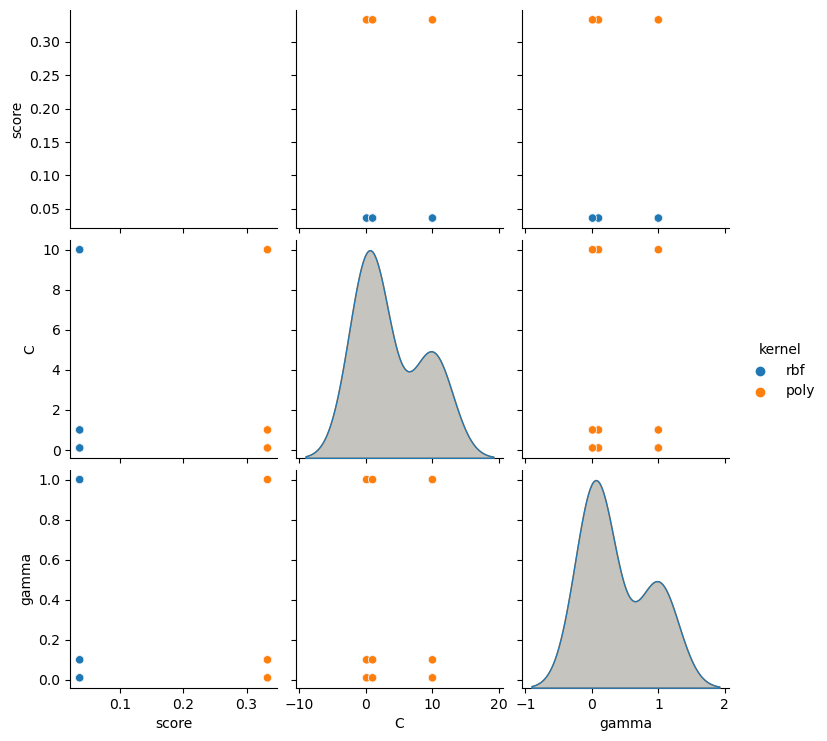

In [13]:
df = pd.DataFrame(all_models)

# pivot_table = df[df['kernel'] == 'rbf'].pivot('C', 'gamma', 'score')  # Filter for 'rbf' kernel
# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

# sns.boxplot(x='kernel', y='score', data=df)

sns.pairplot(df, hue='kernel')

